In [1]:
import nease
import pandas as pd
import gseapy as gp
import numpy as np
import matplotlib.pyplot as plt

## rMATS

In [ ]:
rmats = pd.read_csv('../rmats_with_all_IDs.csv')
rmats = rmats[['GeneID', 'start', 'end']]

In [4]:
events=nease.run(rmats, organism='Mouse')
# Run nease with standard input.

/home/eshipulina/miniconda3/envs/splicing_analysis/lib/python3.9/site-packages/nease/process.py:124: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['coord']=data.apply(lambda x:{x[0],x[1],x[2]}  ,axis = 1)
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed



You selected to remove all exons that are predicted to disturb the ORF or known to result in a non-coding gene.
If you would like to change this option and include all exons, please change the parameter remove_non_in_frame to False. 
Delta PSI column was not found. Proceeding with all events (no filtering)

		Data Summary
**************************************************
67 protein domains are affected by AS.

0 linear motifs are affected by AS.
9 interacting residue are affected by AS.

18 of the affected domains/motifs have known interactions.
57 protein interactions/binding affected.

**************************************************
Running enrichment analysis...


/home/eshipulina/miniconda3/envs/splicing_analysis/lib/python3.9/site-packages/nease/functions.py:220: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  p=int(paths [paths['pathway']==path][ppi_type])


NEASE enrichment done.


In [5]:
mouse = gp.get_library_name(organism='Mouse')
mouse

# This is an enrichement at gene level: all (diff) spliced genes.
# The function use the library gseapy and need gseapy_databases parameter 
# let first check what libraries are available on gseapy for Human

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

In [6]:
# Run on KEGG gene set
enr=events.classic_enrich(gseapy_databases=['KEGG_2019_Mouse'])
enr.head(10)

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

ValueError: Warning: No enrich terms when cutoff = 0.05

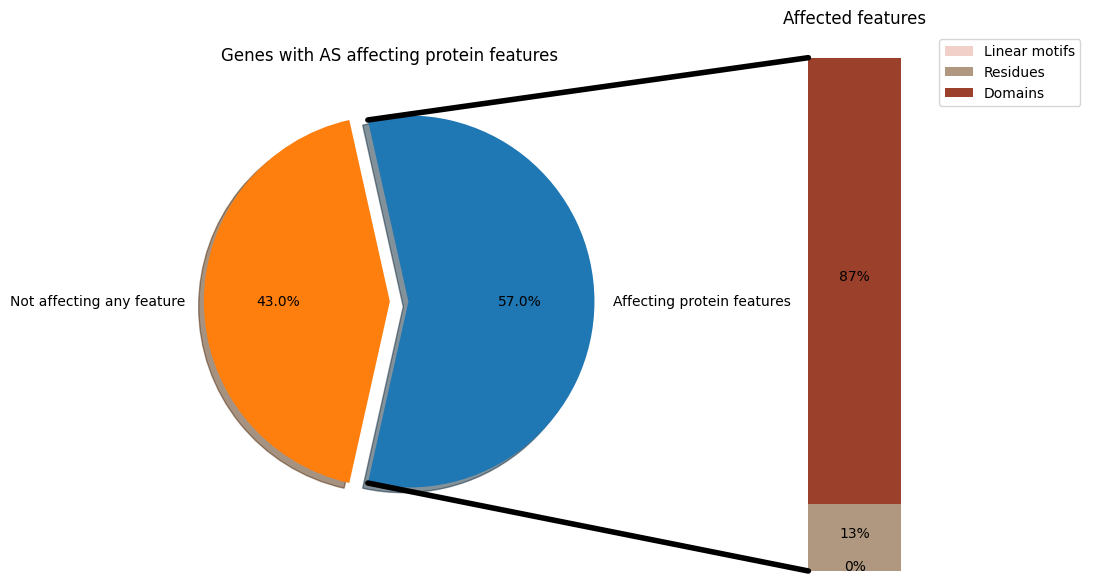

In [8]:
# get stats of the data
events.get_stats()

In [9]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

domains=events.get_domains()
domains.head(10)

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Interaction type,Visualization link
0,Npas1,18142,ENSMUSG00000001988,ENSMUSE00000198004,PF08447,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000198004
1,Ddb2,107986,ENSMUSG00000002109,ENSMUSE00001279685,PF00400,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00001279685
2,Farsa,66590,ENSMUSG00000003808,ENSMUSE00001301859,PF01409,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00001301859
3,Neurl1a,18011,ENSMUSG00000006435,ENSMUSE00000478912,PF07177,-,False,None,
4,Mocs2,17434,ENSMUSG00000015536,ENSMUSE00001301379,PF02391,-,False,None,
5,Mtrf1l,108853,ENSMUSG00000019774,ENSMUSE00001311073,PF00472,-,False,None,
6,Mtrf1l,108853,ENSMUSG00000019774,ENSMUSE00000097969,PF03462,-,False,None,
7,Map7,17761,ENSMUSG00000019996,ENSMUSE00000099637,PF05672,-,False,None,
8,Cyria,76820,ENSMUSG00000020589,ENSMUSE00001009237,PF07159,-,False,None,
9,Ntsr2,18217,ENSMUSG00000020591,ENSMUSE00001417221,PF00001,-,False,None,


In [10]:
# get the affected linear motifs
events.get_elm()

No known linear motif are affected by AS


In [11]:
# get interacting residues affected by AS
events.get_pdb()

,Gene name,NCBI gene ID,Gene stable ID,Co-resolved interactions symbol,Co-resolved interactions
0,Bbs9,319845,ENSMUSG00000035919,Bbs5,72569
1,Ints7,Ints7,ENSMUSG00000037461,"Ints2,Ints1","70422,68510"
2,Chid1,68038,ENSMUSG00000025512,Chid1,68038
3,Thoc7,66231,ENSMUSG00000053453,Thoc7,66231
4,Zcwpw1,381678,ENSMUSG00000037108,"Zcwpw1,Nsd3,Nsd2","381678,234135,107823"
5,Klhl17,231003,ENSMUSG00002076083,Klhl17,231003
6,Mocs2,17434,ENSMUSG00000015536,Mocs2,17434
7,Rgs7,24012,ENSMUSG00000026527,"Gnai2,Rgs7","14678,24012"
8,Rps6ka3,110651,ENSMUSG00000031309,Rps6ka3,110651


In [12]:
# List of affected interactions (domain and motifs binding)
edges=events.get_edges()
edges.head(10)

,Gene name,NCBI gene ID,Identifier,dPSI,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,Klhl17,231003,PF01344,-,9,"Klhl17,Klhl38,Klhl23,Klhl7,Kbtbd8,Ivns1abp,Klhl11,Klhl29,Klhl9","231003,268807,277396,52323,243574,117198,217194,208439,242521"
1,Hyou1,12282,PF00012,-,7,"Copb2,Stub1,Eed,Hspa5,Wdfy4,Hsp90b1,Dnajc10","50797,56424,13626,14828,545030,22027,66861"
2,Ilf3,16201,PF00035,-,7,"Ddx3x,Stau1,Ddx17,Ddx1,Ddx5,Rpl13a,Dhx9","13205,20853,67040,13211,13207,22121,104721"
3,Nae1,234664,PF00899,-,4,"Nedd8,Ubqln4,Ube2f,Uba3","94232,67921,18002,22200"
4,Rgs7,24012,PF00615,-,3,"Gnao1,Gnb5,Gnaq","14681,14697,14682"
5,Tnc,21923,PF00041,-,3,"Cilp,Cntn1,Ncan","214425,12805,13004"
6,Ddb2,107986,PF00400,-,1,Ddb1,13194
7,Npas1,18142,PF08447,-,1,Arnt,11863
8,Chid1,68038,PF00704,-,1,Fndc5,384061
9,Naa40,70999,PF00583,-,1,Eed,13626


In [13]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['KEGG']).sort_values('p_value')
nease_enr.head(25)

NEASE enrichment for the pathway databases:
 ['KEGG']
No enrichment found with the cutoff 0.05.


,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:mmu04141,Protein processing in endoplasmic reticulum - Mus musculus (mouse),KEGG,"Nae1 (1), Hyou1 (4)",0.000435,0.135254,4.754416
1,path:mmu04918,Thyroid hormone synthesis - Mus musculus (mouse),KEGG,"Rgs7 (1), Hyou1 (2)",0.001136,0.135254,4.164472
6,path:mmu04726,Serotonergic synapse - Mus musculus (mouse),KEGG,Rgs7 (4),0.001230,0.135254,2.910244
8,path:mmu04723,Retrograde endocannabinoid signaling - Mus musculus (mouse),KEGG,Rgs7 (4),0.002173,0.136284,2.663024
3,path:mmu04916,Melanogenesis - Mus musculus (mouse),KEGG,"Rgs7 (3), Porcn (1)",0.002639,0.136284,3.646597
9,path:mmu04713,Circadian entrainment - Mus musculus (mouse),KEGG,Rgs7 (4),0.002888,0.136284,2.539340
4,path:mmu04120,Ubiquitin mediated proteolysis - Mus musculus (mouse),KEGG,"Ddb2 (1), Nae1 (2), Hyou1 (1), Klhl17 (1)",0.002891,0.136284,3.590647
11,path:mmu04725,Cholinergic synapse - Mus musculus (mouse),KEGG,Rgs7 (4),0.003732,0.139288,2.428033
12,path:mmu05032,Morphine addiction - Mus musculus (mouse),KEGG,Rgs7 (3),0.003799,0.139288,2.420356
13,path:mmu04727,GABAergic synapse - Mus musculus (mouse),KEGG,Rgs7 (3),0.005597,0.145713,2.252007


In [14]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['Reactome']).sort_values('p_value')
nease_enr.head(25)

NEASE enrichment for the pathway databases:
 ['Reactome']
No enrichment found with the cutoff 0.05.


,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,R-MMU-983169,Class I MHC mediated antigen processing & presentation,Reactome,"Nae1 (2), Hyou1 (2), Klhl17 (3)",0.000042,0.070774,7.575781
1,R-MMU-392499,Metabolism of proteins,Reactome,"Ddb2 (1), Rgs7 (3), Nae1 (3), Hyou1 (2), Ilf3 (2), Fbxo34 (1), Klhl17 (3)",0.000096,0.080544,6.957119
3,R-MMU-983168,Antigen processing: Ubiquitination & Proteasome degradation,Reactome,"Nae1 (2), Hyou1 (1), Klhl17 (3)",0.000238,0.132715,5.124708
9,R-MMU-392518,Signal amplification,Reactome,Rgs7 (3),0.000630,0.236971,3.200574
2,R-MMU-8951664,Neddylation,Reactome,"Ddb2 (1), Nae1 (3), Fbxo34 (1), Klhl17 (3)",0.000708,0.236971,6.300180
12,R-MMU-422356,Regulation of insulin secretion,Reactome,Rgs7 (3),0.001064,0.288905,2.973139
6,R-MMU-597592,Post-translational protein modification,Reactome,"Ddb2 (1), Nae1 (3), Hyou1 (2), Ilf3 (1), Fbxo34 (1), Klhl17 (3)",0.001641,0.288905,3.938269
14,R-MMU-391251,Protein folding,Reactome,Rgs7 (3),0.001726,0.288905,2.763000
13,R-MMU-6814122,Cooperation of PDCL (PhLP1) and TRiC/CCT in G-protein beta folding,Reactome,Rgs7 (3),0.001726,0.288905,2.763000
15,R-MMU-390466,Chaperonin-mediated protein folding,Reactome,Rgs7 (3),0.001726,0.288905,2.763000


In [16]:
# Run on KEGG gene set
events.classic_enrich(gseapy_databases=['KEGG_2019_Mouse'],non_symmetrical_only=True).head(10)

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

ValueError: Warning: No enrich terms when cutoff = 0.05

In [ ]:
# Supported databases:
#database=  ['PharmGKB', 'HumanCyc', 'Wikipathways', 'Reactome','KEGG', 'SMPDB',
#            'Signalink','NetPath', 'EHMN', 'INOH','BioCarta','PID']

In [44]:
# Dilated cardiomyopathy (DCM) - Homo sapiens (human) is 7 on the list
# run path_analysis() with DCM pathway id for more details about diff. spliced genes are their affected interactions
#events.path_analysis('path:mmu05200')

In [45]:
# the gene MYO10 and OBSCN looks interesting, let us see what domain got affected and if the psi is positive or negative
#events.get_edges()[ events.get_edges() ['Gene name']=='Cdk2' ]

In [46]:
# Finally we can visualize affected pathways with nease
# Again we run it on DCM pathway
# you can run this function several times to get a  better visualization

#events.Vis_path('path:mmu05200',k=0.8)

## MAJIQ

In [2]:
majiq = pd.read_csv('../majiq_with_all_IDs_nease.csv')

In [3]:
events=nease.run(majiq, organism='Mouse')
# Run nease with standard input.

/home/eshipulina/miniconda3/envs/splicing_analysis/lib/python3.9/site-packages/nease/process.py:124: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['coord']=data.apply(lambda x:{x[0],x[1],x[2]}  ,axis = 1)



You selected to remove all exons that are predicted to disturb the ORF or known to result in a non-coding gene.
If you would like to change this option and include all exons, please change the parameter remove_non_in_frame to False. 
Delta PSI column was not found. Proceeding with all events (no filtering)

		Data Summary
**************************************************
198 protein domains are affected by AS.

0 linear motifs are affected by AS.
36 interacting residue are affected by AS.

46 of the affected domains/motifs have known interactions.
421 protein interactions/binding affected.

**************************************************
Running enrichment analysis...


/home/eshipulina/miniconda3/envs/splicing_analysis/lib/python3.9/site-packages/nease/functions.py:220: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  p=int(paths [paths['pathway']==path][ppi_type])


NEASE enrichment done.


In [4]:
# Run on KEGG gene set
#enr=events.classic_enrich(gseapy_databases=['KEGG_2019_Mouse'])
#enr.head(10)
#no classic enrichment

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

ValueError: Warning: No enrich terms when cutoff = 0.05

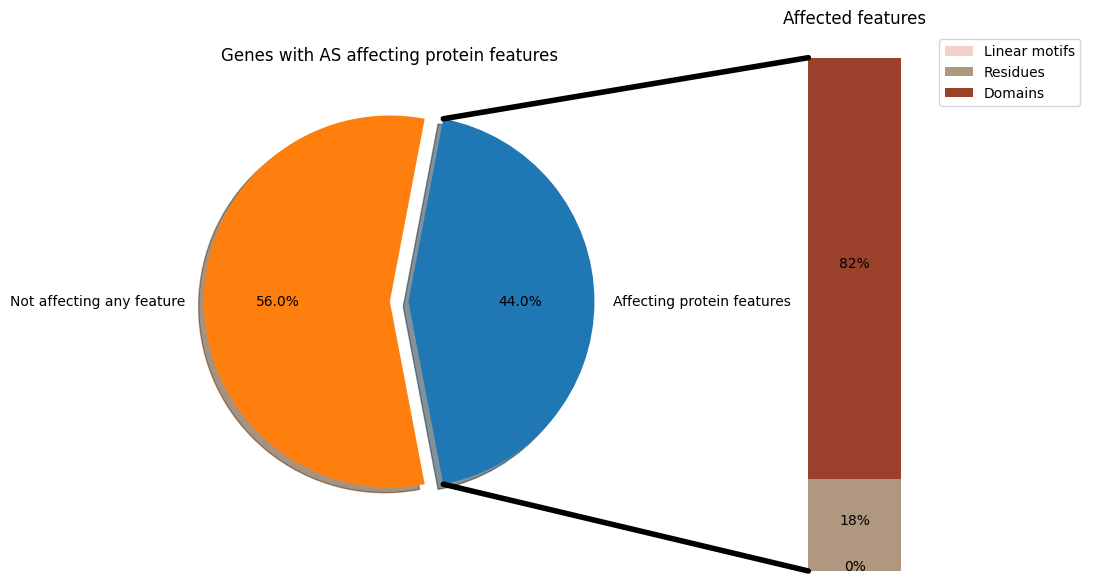

In [5]:
# get stats of the data
events.get_stats()

In [6]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

domains=events.get_domains()
domains.head(10)

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Interaction type,Visualization link
0,Tpd52l1,21987,ENSMUSG00000000296,ENSMUSE00000098057,PF04201,-,False,None,
1,Epn2,13855,ENSMUSG00000001036,ENSMUSE00000367973,PF01417,-,False,None,
2,Foxm1,14235,ENSMUSG00000001517,ENSMUSE00001293028,PF00250,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00001293028
3,Clpb,20480,ENSMUSG00000001829,ENSMUSE00000223171,PF10431,-,False,None,
4,Nfix,18032,ENSMUSG00000001911,ENSMUSE00000606642,PF03165,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000606642
5,Nfix,18032,ENSMUSG00000001911,ENSMUSE00000606642,PF10524,-,False,None,
6,Ddb2,107986,ENSMUSG00000002109,ENSMUSE00001279685,PF00400,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00001279685
7,Kcnn1,84036,ENSMUSG00000002908,ENSMUSE00001389632,PF03530,-,False,None,
8,Zfp959,224893,ENSMUSG00000003198,ENSMUSE00001067464,PF01352,-,False,None,
9,Zfp287,170740,ENSMUSG00000005267,ENSMUSE00000106530,PF01352,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000106530


In [7]:
# get the affected linear motifs
events.get_elm()

No known linear motif are affected by AS


In [8]:
# get interacting residues affected by AS
events.get_pdb()

,Gene name,NCBI gene ID,Gene stable ID,Co-resolved interactions symbol,Co-resolved interactions
0,Lrrc7,242274,ENSMUSG00000028176,"Lrrc7,Patj,Dlg4,Pard3","242274,12695,13385,93742"
1,Abtb1,80283,ENSMUSG00000030083,"Mib1,Abtb1","225164,80283"
2,Atp11b,76295,ENSMUSG00000037400,Atp11b,76295
3,Bbs9,319845,ENSMUSG00000035919,Bbs5,72569
4,Rere,68703,ENSMUSG00000039852,Rere,68703
5,Rims1,116837,ENSMUSG00000041670,"Rab3c,Rap1a","67295,109905"
6,Naa10,56292,ENSMUSG00000031388,Naa10,56292
7,Srxn1,76650,ENSMUSG00000032802,"Prdx4,Srxn1","53381,76650"
8,Zbtb18,30928,ENSMUSG00000063659,"Zbtb18,Zfp236,Zfp119b","329002,240120,30928"
9,Pcdh19,279653,ENSMUSG00000051323,"Fat1,Pcdha5,Pcdh9,Cdh18,Pcdh19,Pcdh18,Pcdhga3","14107,12941,211712,279653,320865,73173,93711"


In [9]:
# List of affected interactions (domain and motifs binding)
edges=events.get_edges()
edges.head(10)

,Gene name,NCBI gene ID,Identifier,dPSI,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,Zfp287,170740,PF00096,-,52,"Zbtb17,Rbak,Zscan10,Sall3,Ctcf,Prdm4,Zfp57,Zfp768,Zfp513,Zscan21,Hinfp,Mynn,Zbtb14,Ikzf3,Zfp473,Ctcfl,Zbtb48,Zfp423,Zfp382,Zfp28,Zfp746,Zfp541,Klf12,Gli3,Zfp24,Zfp128,Zfp932,Zfp770,Gli2,Glis1,Zfp710,Zfp92,Zbtb20,Zfp58,Zfp37,Gzf1,Zfp697,Zfp652,Gli1,Zfp568,Zfp667,Snai1,Zfat,Zfp787,Sall4,Klf15,Zfp62,Zfp27,Zfp281,Zfp93,Zfp3,Prdm5","22642,57782,332221,13018,20689,72843,22715,233890,101023,22697,102423,80732,22666,22780,243963,664799,100090,94187,233060,22690,69228,666528,16597,14634,59057,243833,69504,228491,14633,230587,209225,22754,56490,238693,22696,74533,242109,268469,14632,243905,384763,20613,380993,67109,99377,66277,22720,22689,226442,22755,193043,70779"
1,Zfp287,170740,PF01352,-,52,"Zbtb17,Rbak,Zscan10,Sall3,Ctcf,Prdm4,Zfp57,Zfp768,Zfp513,Zscan21,Hinfp,Mynn,Zbtb14,Ikzf3,Zfp473,Ctcfl,Zbtb48,Zfp423,Zfp382,Zfp28,Zfp746,Zfp541,Klf12,Gli3,Zfp24,Zfp128,Zfp932,Zfp770,Gli2,Glis1,Zfp710,Zfp92,Zbtb20,Zfp58,Zfp37,Gzf1,Zfp697,Zfp652,Gli1,Zfp568,Zfp667,Snai1,Zfat,Zfp787,Sall4,Klf15,Zfp62,Zfp27,Zfp281,Zfp93,Zfp3,Prdm5","22642,57782,332221,13018,20689,72843,22715,233890,101023,22697,102423,80732,22666,22780,243963,664799,100090,94187,233060,22690,69228,666528,16597,14634,59057,243833,69504,228491,14633,230587,209225,22754,56490,238693,22696,74533,242109,268469,14632,243905,384763,20613,380993,67109,99377,66277,22720,22689,226442,22755,193043,70779"
2,Zfp37,22696,PF01352,-,49,"Zbtb17,Zfp287,Rbak,Zscan10,Ctcf,Prdm4,Zfp768,Zfp513,Zscan21,Hinfp,Mynn,Zbtb14,Ikzf3,Zfp473,Ctcfl,Zbtb48,Zfp423,Zfp382,Zfp28,Zfp746,Klf12,Gli3,Zfp24,Zfp128,Zfp120,Zfp932,Zfp770,Gli2,Glis1,Zbtb20,Zfp92,Zfp710,Zfp58,Gzf1,Zfp697,Zfp652,Gli1,Zfp568,Zfp667,Zfat,Zfp787,Sall4,Klf15,Zfp62,Zfp27,Zfp281,Zfp93,Zfp3,Prdm5","22642,170740,57782,332221,13018,72843,233890,101023,22697,102423,80732,22666,22780,243963,664799,100090,94187,233060,22690,69228,16597,14634,59057,243833,104348,69504,228491,14633,230587,56490,22754,209225,238693,74533,242109,268469,14632,243905,384763,380993,67109,99377,66277,22720,22689,226442,22755,193043,70779"
3,Hdac4,208727,PF00850,-,34,"Map3k5,Rps6kc1,Bop1,Dcaf8,Camk1,Camk2d,Rps6ka5,Csnk1a1,Ppib,Phf10,Dnajc2,Zfx,Cask,Stk25,Stk24,Sec13,Ift172,Trio,Wdr70,Dmxl1,Tnks,Mark3,Phip,Gli2,Copa,Hdac4,Smu1,Top1,Kalrn,Grk5,Gnb1,Phkg1,Wdr6,Mast3","26408,320119,12181,98193,52163,108058,73086,93687,19035,72057,22791,22764,12361,59041,223255,110379,67661,223435,545085,240283,21951,17169,83946,14633,12847,208727,74255,21969,545156,14773,14688,18682,83669,546071"
4,Zfp28,22690,PF00096,-,33,"Zfp287,Rbak,Zscan10,Sall3,Prdm4,Zfp768,Zfp513,Zscan21,Hinfp,Ikzf3,Zfp473,Ctcfl,Zfp423,Zfp382,Gli3,Zfp24,Zfp120,Zfp770,Zbtb20,Glis1,Zfp58,Gzf1,Zfp37,Zfp697,Zfp652,Zfp568,Zfp667,Zfp787,Sall4,Zfp62,Zfp281,Zfp3,Prdm5","170740,57782,332221,20689,72843,233890,101023,22697,102423,22780,243963,664799,94187,233060,14634,59057,104348,228491,56490,230587,238693,74533,22696,242109,268469,243905,384763,67109,99377,22720,226442,193043,70779"
5,Zfp652,268469,PF00096,-,30,"Zfp287,Rbak,Sall3,Ctcf,Zfp768,Zfp513,Zscan21,Ikzf3,Zfp473,Ctcfl,Zfp423,Zfp382,Zfp28,Gli3,Zfp24,Zfp120,Zbtb20,Glis1,Zfp710,Zfp58,Zfp37,Gzf1,Zfp697,Zfp667,Zfp787,Sall4,Zfp62,Zfp281,Zfp3,Prdm5","170740,57782,13018,20689,233890,101023,22697,22780,243963,664799,94187,233060,22690,14634,59057,104348,56490,230587,209225,238693,22696,74533,242109,384763,67109,99377,22720,226442,193043,70779"
6,Cdk2,12566,PF00069,-,11,"Ccnd2,Ppp1cc,Pcna,Trp53,Braf,Ccne1,Pla2g4a,Cdkn1a,Cdkn1b,Ccna1,Ccna2","12444,18538,19047,22059,109880,12447,18783,12575,12576,12427,12428"
7,Dlx1,13390,PF00046,-,10,"Sp7,Mixl1,Cdx1,Foxa1,Hoxb13,Tbx21,Barx1,Alx4,Dlx2,Cdx4","170574,27217,12590,15375,15408,57765,12022,11695,13392,12592"
8,Stx4a,20909,PF05739,-,9,"Stx3,Vamp5,Stx6,Stxbp1,Stxbp3,Vamp4,Stxbp2,Stx7,Snap23","20908,53620,58244,20910,20912,53330,20911,53331,20619"
9,Cacna1c,12288,PF00520,-,9,"Scn1a,Scn5a,Cacna1a,Cacna1d,Scn11a,Cacn

In [10]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['KEGG']).sort_values('p_value')
nease_enr.head(25)

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 33 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:mmu05168,Herpes simplex virus 1 infection - Mus musculus (mouse),KEGG,"Zfp287 (15), Trio (1), Enah (1), Tiam2 (1), Bad (2), Cdk2 (2), Nfkb1 (2), Zfp37 (14), Stat2 (1), Zfp28 (9), Zfp652 (9), Zbtb18 (1), Asap1 (1), H2-T22 (1)",6.683382e-33,2.205516e-30,101.746295
2,path:mmu05217,Basal cell carcinoma - Mus musculus (mouse),KEGG,"Ddb2 (1), Zfp287 (3), Cdk2 (2), Rev1 (1), Hdac4 (1), Zfp37 (3), Zfp28 (1), Zfp652 (1), Arhgef4 (1)",2.366190e-08,3.904214e-06,18.679687
1,path:mmu05200,Pathways in cancer - Mus musculus (mouse),KEGG,"Ddb2 (1), Zfp287 (4), Enah (1), Tiam2 (4), Bad (2), Cdk2 (8), Rev1 (1), Hdac4 (4), Nfkb1 (4), Zfp37 (4), Stat2 (2), Arhgap23 (1), Zfp28 (1), Zfp652 (1), Arhgef4 (1), Ntm (1), Asap1 (2), Runx1t1 (1)",1.582010e-07,1.740211e-05,19.235541
6,path:mmu04340,Hedgehog signaling pathway - Mus musculus (mouse),KEGG,"Zfp287 (3), Bad (1), Cdk2 (1), Hdac4 (2), Zfp37 (3), Slit2 (1), Zfp28 (1), Zfp652 (1)",5.745558e-07,4.740085e-05,12.481336
5,path:mmu05222,Small cell lung cancer - Mus musculus (mouse),KEGG,"Ddb2 (1), Zfp287 (1), Bad (2), Cdk2 (4), Rev1 (1), Nfkb1 (2), Zfp37 (1), Asap1 (1), Runx1t1 (1)",5.300280e-06,3.498185e-04,12.922776
3,path:mmu05202,Transcriptional misregulation in cancer - Mus musculus (mouse),KEGG,"Ddb2 (2), Zfp287 (1), Bad (1), Cdk2 (6), Rev1 (1), Nfkb1 (1), Zfp37 (1), Pbx4 (2), Lmo1 (1), Bptf (1), Cdk14 (1), Asap1 (1)",7.393211e-06,4.066266e-04,15.393501
4,path:mmu05161,Hepatitis B - Mus musculus (mouse),KEGG,"Ddb2 (2), Enah (1), Tiam2 (4), Bad (1), Cdk2 (7), Nfkb1 (2), Stat2 (2), Lsm14a (1), Asap1 (1), Ankhd1 (1)",1.993430e-05,9.397597e-04,13.294736
39,path:mmu04130,SNARE interactions in vesicular transport - Mus musculus (mouse),KEGG,Stx4a (6),5.122154e-05,2.112888e-03,4.290547
9,path:mmu04020,Calcium signaling pathway - Mus musculus (mouse),KEGG,"Tiam2 (4), Hdac4 (3), P2rx4 (1), Cacna1c (4), Ntm (3)",7.634120e-05,2.799177e-03,9.206431
8,path:mmu04722,Neurotrophin signaling pathway - Mus musculus (mouse),KEGG,"Zfp287 (1), Enah (1), Tiam2 (1), Bad (1), Cdk2 (2), Hdac4 (3), Nfkb1 (2), Zfp37 (1), Dnm3 (1), Rims1 (1), Zfp28 (1), Ntm (2), Asap1 (1), Rps6ka3 (1)",1.996943e-04,6.589912e-03,9.788312


In [11]:
path = events.path_analysis('path:mmu05200')

Enrichment of the pathway: Pathways in cancer - Mus musculus (mouse).

Overall p_value:  1.582009721531451e-07




/home/eshipulina/miniconda3/envs/splicing_analysis/lib/python3.9/site-packages/nease/functions.py:315: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  p=int(Pathways [Pathways['external_id']==path_id][ppi_type])


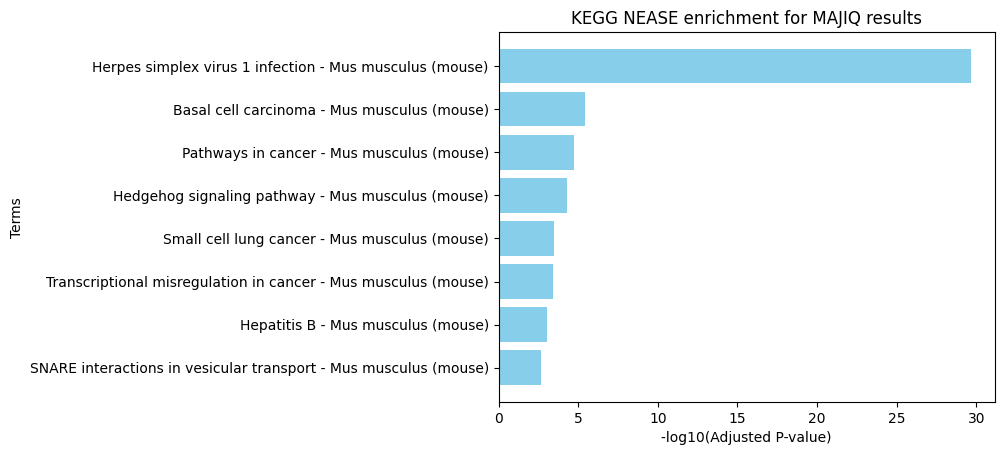

In [12]:
Term = nease_enr['Pathway name'][:8]
Pvalues =nease_enr['adj p_value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]

plt.barh(Term[::-1],Pvalues[::-1], color='skyblue' )
plt.title('KEGG NEASE enrichment for MAJIQ results')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
#plt.savefig('nease_enr_KEGG_majiq.pdf',format='pdf',bbox_inches='tight')
plt.gca().set_facecolor('none')  # Remove the background of the axes
plt.gcf().patch.set_facecolor('none')  # Remove the background of the figure
plt.show()

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 18 enriched pathways after multiple testing correction.



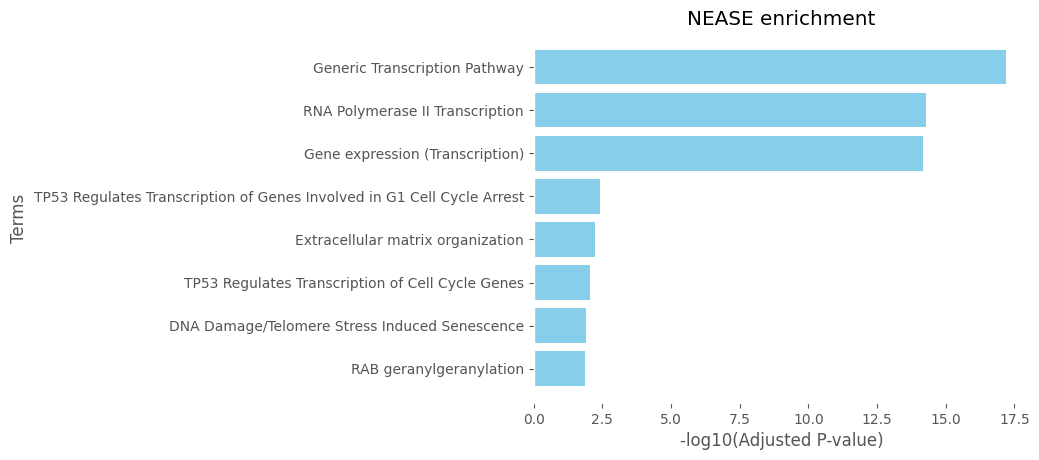

In [71]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['Reactome']).sort_values('p_value')
nease_enr.head(25)

Term = nease_enr['Pathway name'][:8]
Pvalues =nease_enr['adj p_value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]

plt.barh(Term[::-1],Pvalues[::-1], color='skyblue')
plt.title('NEASE enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
#plt.savefig('nease_enr_Reactome_majiq.pdf',format='pdf',bbox_inches='tight')
plt.gca().set_facecolor('none')  # Remove the background of the axes
plt.gcf().patch.set_facecolor('none')  # Remove the background of the figure
plt.show()

In [13]:
# Run on KEGG gene set
#enr = events.classic_enrich(gseapy_databases=['KEGG_2019_Mouse'],non_symmetrical_only=True).head(10)

In [ ]:
#Могло бы быть, но классический энричмент ничего не дал
# Term = enr['Term'][:8]
# Term = [x.split('Homo')[0] for x in Term]
# Pvalues =enr['Adjusted P-value'][:8]
# Pvalues=[ -np.log10(x) for x in Pvalues]
# plt.style.use('ggplot')

# plt.barh(Term[::-1],Pvalues[::-1] )
# plt.title('Classic gene set enrichment')
# plt.ylabel('Terms')
# plt.xlabel('-log10(Adjusted P-value)')
# plt.savefig('AS data/Platelet/classic_en.pdf',format='pdf',bbox_inches='tight')

# plt.show()

In [16]:
nease_enr.head(5)

,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:mmu05168,Herpes simplex virus 1 infection - Mus musculus (mouse),KEGG,"Zfp287 (15), Trio (1), Enah (1), Tiam2 (1), Bad (2), Cdk2 (2), Nfkb1 (2), Zfp37 (14), Stat2 (1), Zfp28 (9), Zfp652 (9), Zbtb18 (1), Asap1 (1), H2-T22 (1)",6.683382e-33,2.205516e-30,101.746295
2,path:mmu05217,Basal cell carcinoma - Mus musculus (mouse),KEGG,"Ddb2 (1), Zfp287 (3), Cdk2 (2), Rev1 (1), Hdac4 (1), Zfp37 (3), Zfp28 (1), Zfp652 (1), Arhgef4 (1)",2.366190e-08,3.904214e-06,18.679687
1,path:mmu05200,Pathways in cancer - Mus musculus (mouse),KEGG,"Ddb2 (1), Zfp287 (4), Enah (1), Tiam2 (4), Bad (2), Cdk2 (8), Rev1 (1), Hdac4 (4), Nfkb1 (4), Zfp37 (4), Stat2 (2), Arhgap23 (1), Zfp28 (1), Zfp652 (1), Arhgef4 (1), Ntm (1), Asap1 (2), Runx1t1 (1)",1.582010e-07,1.740211e-05,19.235541
6,path:mmu04340,Hedgehog signaling pathway - Mus musculus (mouse),KEGG,"Zfp287 (3), Bad (1), Cdk2 (1), Hdac4 (2), Zfp37 (3), Slit2 (1), Zfp28 (1), Zfp652 (1)",5.745558e-07,4.740085e-05,12.481336
5,path:mmu05222,Small cell lung cancer - Mus musculus (mouse),KEGG,"Ddb2 (1), Zfp287 (1), Bad (2), Cdk2 (4), Rev1 (1), Nfkb1 (2), Zfp37 (1), Asap1 (1), Runx1t1 (1)",5.300280e-06,3.498185e-04,12.922776


In [43]:
# run path_analysis() with some pathway id for more details about diff. spliced genes are their affected interactions
events.path_analysis('path:mmu05217')

Enrichment of the pathway: Basal cell carcinoma - Mus musculus (mouse).

Overall p_value:  2.3661901657412564e-08




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,Cdk2,12566,False,2/11,0.001237,"Trp53,Cdkn1a","22059,12575"
1,Zfp37,22696,False,3/49,0.001732,"Gli3,Gli2,Gli1","14634,14633,14632"
2,Zfp287,170740,False,3/52,0.002056,"Gli3,Gli2,Gli1","14634,14633,14632"
3,Arhgef4,226970,False,1/2,0.009615,Apc2,23805
4,Rev1,56210,False,1/3,0.014388,Polk,27015
5,Ddb2,107986,True,1/9,0.042547,Ddb2,107986
6,Zfp652,268469,False,1/30,0.134936,Gli3,14634
7,Zfp28,22690,False,1/33,0.147389,Gli3,14634
8,Hdac4,208727,False,1/34,0.151499,Gli2,14633


In [50]:
for i in nease_enr.head(8)['Pathway ID']:
    output_table = events.path_analysis(i)
    output_table = output_table[output_table['p_value'] < 0.05]
    table_name = nease_enr[nease_enr['Pathway ID'] == i]['Pathway name'].values[0] #name for a file
    table_name = './pathways_tables/MAJIQ_' + table_name
    output_table.to_csv(table_name, index=False)
    events.Vis_path(i,k=0.8, file = './pathways_tables/')

Enrichment of the pathway: Herpes simplex virus 1 infection - Mus musculus (mouse).

Overall p_value:  6.683381931719694e-33


Enrichment of the pathway: Herpes simplex virus 1 infection - Mus musculus (mouse).

Overall p_value:  6.683381931719694e-33




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

Visualization of the pathway generated in: ./pathways_tables/Herpes simplex virus 1 infection - Mus musculus (mouse).html
Enrichment of the pathway: Basal cell carcinoma - Mus musculus (mouse).

Overall p_value:  2.3661901657412564e-08


Enrichment of the pathway: Basal cell carcinoma - Mus musculus (mouse).

Overall p_value:  2.3661901657412564e-08




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

Visualization of the pathway generated in: ./pathways_tables/Basal cell carcinoma - Mus musculus (mouse).html
Enrichment of the pathway: Pathways in cancer - Mus musculus (mouse).

Overall p_value:  1.582009721531451e-07


Enrichment of the pathway: Pathways in cancer - Mus musculus (mouse).

Overall p_value:  1.582009721531451e-07




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

Visualization of the pathway generated in: ./pathways_tables/Pathways in cancer - Mus musculus (mouse).html
Enrichment of the pathway: Hedgehog signaling pathway - Mus musculus (mouse).

Overall p_value:  5.74555811950667e-07


Enrichment of the pathway: Hedgehog signaling pathway - Mus musculus (mouse).

Overall p_value:  5.74555811950667e-07




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

Visualization of the pathway generated in: ./pathways_tables/Hedgehog signaling pathway - Mus musculus (mouse).html
Enrichment of the pathway: Small cell lung cancer - Mus musculus (mouse).

Overall p_value:  5.300280495152548e-06


Enrichment of the pathway: Small cell lung cancer - Mus musculus (mouse).

Overall p_value:  5.300280495152548e-06




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

Visualization of the pathway generated in: ./pathways_tables/Small cell lung cancer - Mus musculus (mouse).html
Enrichment of the pathway: Transcriptional misregulation in cancer - Mus musculus (mouse).

Overall p_value:  7.393210719831036e-06


Enrichment of the pathway: Transcriptional misregulation in cancer - Mus musculus (mouse).

Overall p_value:  7.393210719831036e-06




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

Visualization of the pathway generated in: ./pathways_tables/Transcriptional misregulation in cancer - Mus musculus (mouse).html
Enrichment of the pathway: Hepatitis B - Mus musculus (mouse).

Overall p_value:  1.9934295686737847e-05


Enrichment of the pathway: Hepatitis B - Mus musculus (mouse).

Overall p_value:  1.9934295686737847e-05




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

Visualization of the pathway generated in: ./pathways_tables/Hepatitis B - Mus musculus (mouse).html
Enrichment of the pathway: SNARE interactions in vesicular transport - Mus musculus (mouse).

Overall p_value:  5.122153787531796e-05


Enrichment of the pathway: SNARE interactions in vesicular transport - Mus musculus (mouse).

Overall p_value:  5.122153787531796e-05




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

Visualization of the pathway generated in: ./pathways_tables/SNARE interactions in vesicular transport - Mus musculus (mouse).html


In [44]:
# some genes look interesting, let us see what domain got affected and if the psi is positive or negative
events.get_edges()[ events.get_edges() ['Gene name']=='Cdk2' ]

,Gene name,NCBI gene ID,Identifier,dPSI,Number of affected interactions,Affected binding,Affected binding (NCBI)
6,Cdk2,12566,PF00069,-,11,"Ccnd2,Ppp1cc,Pcna,Trp53,Braf,Ccne1,Pla2g4a,Cdkn1a,Cdkn1b,Ccna1,Ccna2","12444,18538,19047,22059,109880,12447,18783,12575,12576,12427,12428"


In [49]:
# Finally we can visualize affected pathways with nease
# Again we run it on the pathway
# you can run this function several times to get a  better visualization

#events.Vis_path('path:mmu05200',k=0.8, file = './pathways_tables/')

Enrichment of the pathway: Pathways in cancer - Mus musculus (mouse).

Overall p_value:  1.582009721531451e-07




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

Visualization of the pathway generated in: ./pathways_tables/Pathways in cancer - Mus musculus (mouse).html


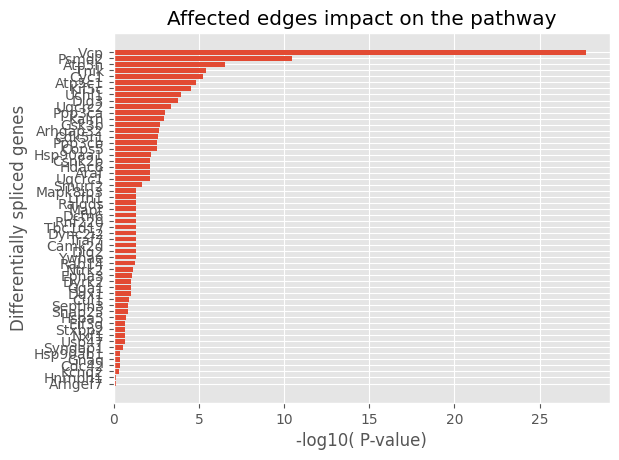

In [80]:
Genes = path['Spliced genes']
Pvalues = path['p_value']
Pvalues=[ -np.log10(x) for x in Pvalues]

plt.barh(Genes[::-1],Pvalues[::-1] )
plt.title('Affected edges impact on the pathway')
plt.ylabel('Differentially spliced genes')
plt.xlabel('-log10( P-value)')
plt.savefig('genes_majiq_cancer_pathways.pdf',format='pdf',bbox_inches='tight')
plt.show()

## DEXSeq

In [2]:
dexseq = pd.read_csv('../../splicing_DEXSeq/dxr2.csv')
dexseq = dexseq[dexseq['padj'] < 0.1]
dexseq = dexseq[['groupID', 'genomicData.start', 'genomicData.end']]

/tmp/ipykernel_3807208/365808890.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dexseq = pd.read_csv('../../splicing_DEXSeq/dxr2.csv')


In [3]:
len(dexseq['groupID'].unique())

1107

In [4]:
events=nease.run(dexseq, organism='Mouse')
# Run nease with standard input.

/home/eshipulina/miniconda3/envs/splicing_analysis/lib/python3.9/site-packages/nease/process.py:124: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['coord']=data.apply(lambda x:{x[0],x[1],x[2]}  ,axis = 1)



You selected to remove all exons that are predicted to disturb the ORF or known to result in a non-coding gene.
If you would like to change this option and include all exons, please change the parameter remove_non_in_frame to False. 


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Delta PSI column was not found. Proceeding with all events (no filtering)

		Data Summary
**************************************************
496 protein domains are affected by AS.

0 linear motifs are affected by AS.
60 interacting residue are affected by AS.

196 of the affected domains/motifs have known interactions.
1192 protein interactions/binding affected.

**************************************************
Running enrichment analysis...


/home/eshipulina/miniconda3/envs/splicing_analysis/lib/python3.9/site-packages/nease/functions.py:220: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  p=int(paths [paths['pathway']==path][ppi_type])


NEASE enrichment done.


In [5]:
# Run on KEGG gene set
enr=events.classic_enrich(gseapy_databases=['KEGG_2019_Mouse'])
enr.head(10)

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Mouse,Endocytosis,37/269,3.018987e-07,0.000079,0,0,2.781409,41.757780,SH3GL3;RAB7;SRC;CLTC;VPS4A;ARRB1;ASAP1;VPS26B;AGAP3;AP2A2;CDC42;SNX1;ZFYVE27;GRK2;CAPZB;KIF5C;CHMP1A;GRK6;VPS35;RAB8A;GIT1;PSD;ARFGEF1;HSPA8;PRKCI;SMURF2;WWP1;ARPC4;VPS37B;DNM1;ACAP3;HGS;NEDD4;CHMP2B;CHMP7;H2-D1;FGFR2
1,KEGG_2019_Mouse,Ubiquitin mediated proteolysis,22/138,7.008867e-06,0.000922,0,0,3.282171,38.953900,PIAS4;UBE2F;PIAS3;SMURF2;FBXW7;UBE2E3;CUL1;HUWE1;UBE4A;UBE2E2;WWP1;UBE4B;WWP2;DDB1;NEDD4;UBR5;ANAPC5;TRIM37;STUB1;SKP2;ANAPC1;BIRC2
2,KEGG_2019_Mouse,Hedgehog signaling pathway,11/44,2.012790e-05,0.001765,0,0,5.736010,62.025790,GSK3B;GRK2;CCND2;SMURF2;CSNK1A1;CUL1;SPOP;BCL2;ARRB1;CSNK1E;CSNK1G2
3,KEGG_2019_Mouse,Protein processing in endoplasmic reticulum,23/163,3.365656e-05,0.002213,0,0,2.842113,29.271777,PPP1R15A;HSPA8;MBTPS1;VCP;HSP90AA1;HSP90AB1;HSPA5;SEL1L;CUL1;UBE4B;PDIA6;HSPBP1;HSP90B1;DNAJB1;GANAB;DNAJC5;BCL2;HYOU1;STUB1;STT3B;CALR;UBQLN4;SEC31A
4,KEGG_2019_Mouse,Axon guidance,23/180,1.580948e-04,0.008316,0,0,2.532070,22.161480,EPHA5;SEMA6B;EPHA4;SEMA6C;GSK3B;CAMK2D;UNC5A;SEMA4D;SRC;RYK;PIK3CD;L1CAM;SSH1;ROBO1;GNAI2;CDC42;PPP3CA;EFNA3;PPP3CB;PAK1;DPYSL5;EPHB2;EPHA3
5,KEGG_2019_Mouse,Biosynthesis of unsaturated fatty acids,8/32,2.742991e-04,0.012023,0,0,5.723082,46.936660,FADS2;ACOT7;SCP2;ELOVL5;ACOX1;TECR;SCD2;FADS1
6,KEGG_2019_Mouse,Morphine addiction,14/92,5.151720e-04,0.019356,0,0,3.089708,23.392212,GABBR2;GABBR1;PDE1B;GABRA5;ARRB1;ADCY2;GABRG2;ADCY6;GNAI2;GRK2;PDE10A;GNB2;GRK6;GNAS
7,KEGG_2019_Mouse,Spliceosome,17/132,9.936717e-04,0.032667,0,0,2.546677,17.607991,HSPA8;SF3B2;PPIL1;HNRNPA3;SF3B3;SF3A2;DHX8;SRSF1;THOC2;PRPF8;PRPF4;SART1;XAB2;SRSF5;HNRNPC;SNRPC;SNRNP200
8,KEGG_2019_Mouse,Estrogen signaling pathway,17/134,1.176651e-03,0.034384,0,0,2.502878,16.882118,ATF2;HSPA8;NCOA2;GABBR2;HSP90AA1;GABBR1;HSP90AB1;SRC;PIK3CD;ADCY2;ADCY6;HSP90B1;GNAI2;GNAQ;GNAS;BCL2;GRB2
9,KEGG_2019_Mouse,GABAergic synapse,13/90,1.323954e-03,0.034820,0,0,2.903773,19.243686,GABBR2;GABBR1;SRC;GABRA5;GAD1;ABAT;ADCY2;SLC6A1;GABRG2;ADCY6;TRAK2;GNAI2;GNB2


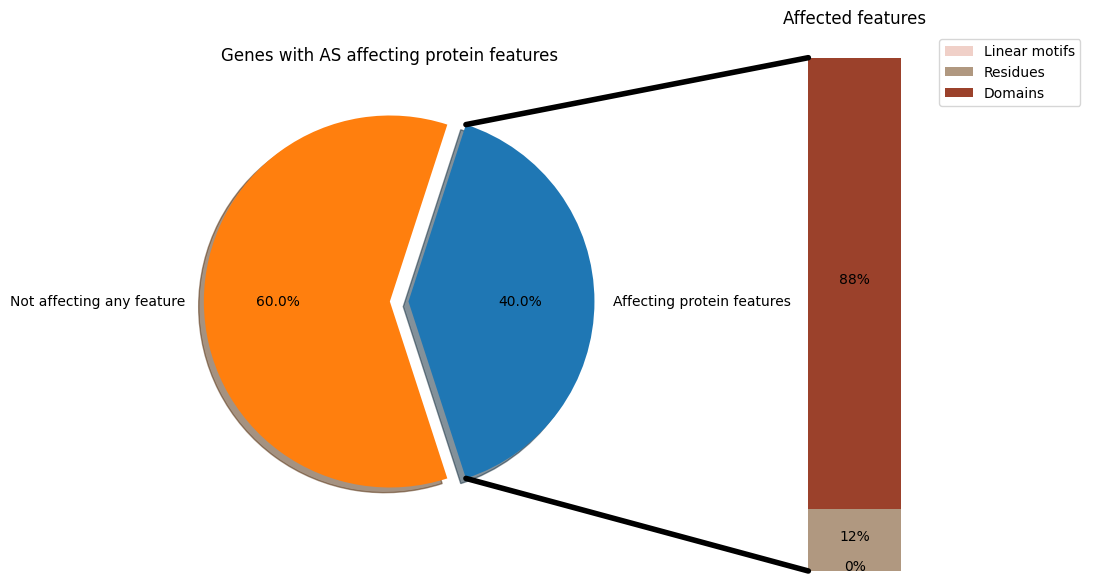

In [6]:
# get stats of the data
events.get_stats()

In [7]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

domains=events.get_domains()
domains.head(10)

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Interaction type,Visualization link
0,Narf,67608,ENSMUSG00000000056,ENSMUSE00000333527,PF02906,-,False,None,
1,Narf,67608,ENSMUSG00000000056,ENSMUSE00000333527,PF02256,-,False,None,
2,Ccnd2,12444,ENSMUSG00000000184,ENSMUSE00001363160,PF00134,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00001363160
3,Trappc10,216131,ENSMUSG00000000374,ENSMUSE00000610706,PF12584,-,False,None,
4,Dnajc5,13002,ENSMUSG00000000826,ENSMUSE00000170833,PF00226,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000170833
5,Dlg3,53310,ENSMUSG00000000881,ENSMUSE00000798025,PF00625,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000798025
6,Araf,11836,ENSMUSG00000001127,ENSMUSE00001238564,PF02196,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00001238564
7,Ckb,12709,ENSMUSG00000001270,ENSMUSE00000443170,PF02807,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000443170
8,Smg5,229512,ENSMUSG00000001415,ENSMUSE00000292662,PF10374,-,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000292662
9,Cyp51,13121,ENSMUSG00000001467,ENSMUSE00000362834,PF00067,-,False,None,


In [8]:
# get the affected linear motifs
events.get_elm()

No known linear motif are affected by AS


In [9]:
# get interacting residues affected by AS
events.get_pdb()

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


,Gene name,NCBI gene ID,Gene stable ID,Co-resolved interactions symbol,Co-resolved interactions
0,Pcdhb22,93893,ENSMUSG00000073591,"Pcdha8,Pcdh17,Clstn3,Pcdhgb6,Pcdhb17,Pcdh1,Cdh22,Pcdhb13,Pcdh7,Cdh23,Pcdhb22","353235,232370,219228,93703,93888,75599,104010,93884,54216,22295,93893"
1,Lamtor2,83409,ENSMUSG00000028062,Lamtor2,83409
2,Kidins220,77480,ENSMUSG00000036333,"Kidins220,Arl8b,Rab11b","77480,67166,19326"
3,Snx1,56440,ENSMUSG00000032382,Snx27,76742
4,Anapc5,59008,ENSMUSG00000029472,"Cdc23,Anapc15,Anapc5,Anapc4","52563,75430,59008,52206"
5,Mtf2,17765,ENSMUSG00000029267,Kmt2b,75410
6,Actr3,74117,ENSMUSG00000026341,Actr3,74117
7,Atp5h,71679,ENSMUSG00000034566,Atp5h,71679
8,Ppfia2,327814,ENSMUSG00000053825,"Ppfia2,Ppfia4,Ppfia1","233977,68507,327814"
9,Smarca2,67155,ENSMUSG00000024921,"Bptf,624153,Smarca2,H2aj","207165,624153,67155,232440"


In [10]:
# List of affected interactions (domain and motifs binding)
edges=events.get_edges()
edges.head(10)

,Gene name,NCBI gene ID,Identifier,dPSI,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,Hnrnph1,59013,PF00076,-,50,"Tardbp,Pabpc1,Syncrip,Snrpd2,Ptbp2,Tcerg1,Sf3b3,Cwc27,Lsm2,Hnrnpc,Lsm3,Plrg1,Hnrnph2,Hnrnpu,Ddx1,Hnrnpdl,Snrnp200,Prpf8,Eed,Ddx5,Ncbp1,Ddx3x,Khsrp,Sf3b1,Hnrnpa3,Hnrnpa2b1,Tia1,Dhx15,Ppil1,Eif4a3,Srsf1,Magoh,Fus,Ddx17,Prpf19,Alyref,Ncl,Ppwd1,Rbm8a,Snrpd1,Mtrex,Celf1,Hnrnpul1,Hnrnpf,Zbtb7b,Hnrnpk,Dhx9,Snrpd3,Ptbp1,Unk","230908,18458,56403,56195,107686,56070,101943,67285,27756,15381,67678,53317,56258,51810,104721,50926,320632,192159,13626,13207,433702,13205,16549,81898,229279,53379,21841,13204,68816,192170,110809,17149,233908,67040,28000,21681,17975,238831,60365,20641,72198,13046,232989,98758,22724,15387,13211,67332,19205,217331"
1,Syngap1,240057,PF00616,-,38,"Prkcg,Srgap1,Plcl1,Kalrn,Syngap1,Dlg1,Srgap2,Fgd4,Agap3,Dlg2,Rab1a,Rasal1,Dlg4,Sorbs2,Sorbs1,Arhgap42,Iqgap2,Cyth2,Rab3a,Prkce,Rab2a,Rab3c,Rasal2,Grk3,Iqgap1,Asap2,Agap2,Dnm1,Arhgap26,Dock1,Arhgap15,Dlg3,Agap1,Nck2,Arhgap21,Cnksr2,Rab10,Dab2ip","18752,117600,227120,545156,240057,13383,14270,224014,213990,23859,19324,19415,13385,234214,20411,71544,544963,19158,19339,18754,59021,67295,226525,320129,29875,211914,216439,13429,71302,330662,76117,53310,347722,17974,71435,245684,19325,69601"
2,Gsk3b,56637,PF00069,-,37,"Hsp90aa1,Fermt2,Acvrl1,Map3k7,Gsk3a,Foxp3,Syngap1,Cdk5r1,Prkar2a,Axin2,Apc,Ctnnd2,Dnm1l,Eed,Axin1,Smad3,Akt2,Ror2,Ppp1ca,Plekho1,Tab1,Tlr3,Tnik,Ctnnb1,Agap2,Prkcz,Ctnnd1,Snai1,Trp53,Map3k4,Gipc1,Lrrk2,Akt1,Shank3,Hcn1,Wdtc1,Csnk1a1","15519,218952,11482,26409,606496,20371,240057,12569,19087,12006,11789,18163,74006,13626,12005,17127,11652,26564,19045,93687,67220,66513,142980,665113,12387,216439,18762,12388,20613,22059,26407,67903,66725,58234,15165,230796,11651"
3,Cdc42,12540,PF00071,-,31,"Cit,Ophn1,Rock2,Arhgap32,Srgap1,Pak1,Pak2,Rgs14,Dock9,Arhgap29,Arhgap1,Dock10,Pcbp1,Pak3,Arhgdia,Git1,Ocrl,Mark4,Dock11,Arhgap33,Iqgap1,Agap2,Fnbp1,Rac1,Arhgef7,Lrrk2,Arhgap44,Cdc42ep4,Ppp1r9b,Rap1b,Fmr1","12704,94190,19878,330914,117600,18479,224105,51791,105445,214137,228359,210293,23983,18481,192662,216963,320634,232944,75974,233071,29875,216439,14269,19353,54126,66725,216831,56699,217124,215449,14265"
4,Ywhae,22627,PF00244,-,29,"Map2k2,Mark2,Map2k1,Crk,Taok2,Srgap2,Sh3pxd2a,Dclk1,Dlg4,Nuak1,Sorbs2,Srgap3,Ksr1,Mark4,Ywhah,Brsk2,Dyrk1a,Ywhaq,Ywhag,Mark3,Ogt,Dclk2,Lrrk2,Ywhab,Mark1,Brsk1,Ahi1,Ywhaz,Wwtr1","26396,13728,26395,12928,381921,14270,14218,13175,13385,77976,234214,259302,16706,232944,22629,75770,13548,22630,22628,17169,108155,70762,66725,54401,226778,381979,52906,22631,97064"
5,Hsp90ab1,15516,PF02518,-,27,"Hsp90aa1,Tomm34,Hspa1b,Fkbp5,Hspa8,Hsph1,Sugt1,Ppp5c,Stip1,Hsp90ab1,Cdc37,Hspa4,Mapk7,Hspa5,Itgb1bp2,Cdkl5,Rpap3,Chordc1,Dclk2,Hspa2,Nudcd2,Ahr,Ptges3,Ppid,Stk32c,Sgta,Akt1","15519,67145,15511,14229,15481,15505,67955,19060,20867,15516,12539,15525,23939,14828,26549,382253,71919,70762,66917,15512,52653,11622,56351,67738,57740,52551,11651"
6,Zfp513,101023,PF00096,-,27,"Zfp3,Zscan2,Zfp768,Pou5f1,Zscan10,Ctcf,Gli3,Ikzf3,Zscan21,Zfp652,Zfp287,Zfp568,Zfp667,Zfp28,Zfp37,Zfp382,Prdm4,Rbak,Mzf1,Gzf1,Zfp58,Zfp787,Zfp62,Ctcfl,Zfp473,Zfp24,Zfp423","193043,22691,233890,18999,13018,332221,14634,22780,22697,268469,170740,243905,384763,22690,22696,233060,72843,57782,109889,74533,238693,67109,22720,664799,243963,59057,94187"
7,Cul1,26965,PF00888,-,26,"Fbxo2,Fbxl3,Fbxo15,Fbxw7,Rbx1,Fbxo44,Btrc,Cand2,Eed,Fbxl15,Chek1,Fbxw4,Cand1,Fbxl21,Fbxo22,Psmb3,Cul3,Kdm2b,Fbxl20,Fbxw2,Cul7,Psmb2,Psma4,Fbxw8,Skp1,Skp2","230904,50789,50764,50754,56438,230903,12234,67088,13626,68431,12649,30838,71902,213311,71999,26446,26554,30841,72194,30050,66515,26445,26441,231672,21402,27401"
8,Hsp90aa1,15519,PF00183,-,25,"Mark2,Fkbp5,Gsk3b,Fkbp4,Ulk1,Hspa8,Hsph1,Ppp5c,Stip1,Hsp90ab1,Cdc37,Hspa4,Hspa5,Itgb1bp2,Akt3,Chordc1,Hspa2,Dclk2,Lrrk2,Ahsa1,Ppid,Stk32c,Cdk4,Prkcd,Akt1","13728,14229,56637,14228,22241,15481,15505,19060,20867,15516,12539,15525,14828,26549,23797,70762,66917,155

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 187 enriched pathways after multiple testing correction.

Enrichment of the pathway: Pathways of neurodegeneration - multiple diseases - Mus musculus (mouse).

Overall p_value:  9.160115733056732e-32




/home/eshipulina/miniconda3/envs/splicing_analysis/lib/python3.9/site-packages/nease/functions.py:315: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  p=int(Pathways [Pathways['external_id']==path_id][ppi_type])
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


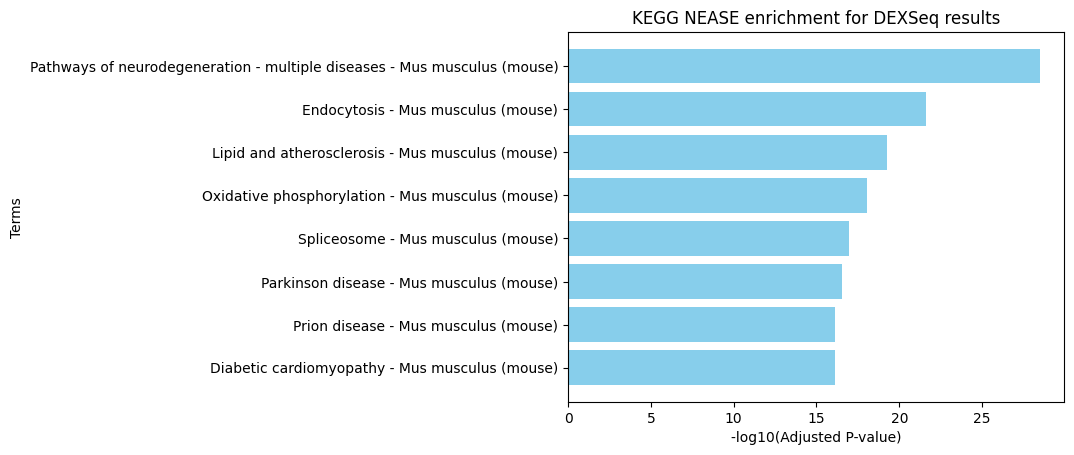

In [11]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['KEGG']).sort_values('p_value')
#nease_enr.head(25)

Term = nease_enr['Pathway name'][:8]
Pvalues =nease_enr['adj p_value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]

path = events.path_analysis('path:mmu05022')

plt.barh(Term[::-1],Pvalues[::-1], color='skyblue' )
plt.title('KEGG NEASE enrichment for DEXSeq results')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.gca().set_facecolor('none')  # Remove the background of the axes
plt.gcf().patch.set_facecolor('none')  # Remove the background of the figure
#plt.savefig('nease_enr_KEGG_DEXseq.pdf',format='pdf',bbox_inches='tight')
plt.show()

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 187 enriched pathways after multiple testing correction.

Enrichment of the pathway: Pathways of neurodegeneration - multiple diseases - Mus musculus (mouse).

Overall p_value:  9.160115733056732e-32




/home/eshipulina/miniconda3/envs/splicing_analysis/lib/python3.9/site-packages/nease/functions.py:315: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  p=int(Pathways [Pathways['external_id']==path_id][ppi_type])
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


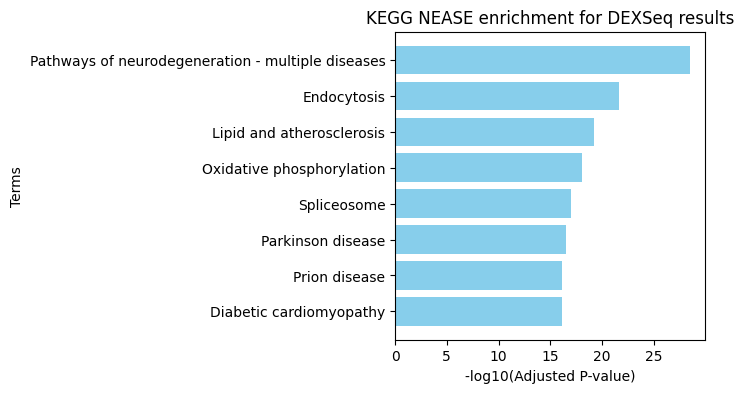

In [12]:
# Run NEASE enrichment on affected edges
nease_enr = events.enrich(database=['KEGG']).sort_values('p_value')

# Select top terms and remove 'Mus musculus' from pathway names
Term = nease_enr['Pathway name'][:8].str.replace(' - Mus musculus \\(.*\\)', '', regex=True)
Pvalues = [-np.log10(x) for x in nease_enr['adj p_value'][:8]]

# Run pathway analysis
path = events.path_analysis('path:mmu05022')

# Adjust figure size to reduce width
plt.figure(figsize=(4, 4))  # Adjust width and height as needed

# Create horizontal bar plot
plt.barh(Term[::-1], Pvalues[::-1], color='skyblue')

# Customize appearance
plt.title('KEGG NEASE enrichment for DEXSeq results')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.gca().set_facecolor('none')  # Remove background from axes
plt.gcf().patch.set_facecolor('none')  # Remove background from figure

# Show plot
plt.show()


In [12]:
for i in nease_enr.head(8)['Pathway ID']:
    output_table = events.path_analysis(i)
    output_table = output_table[output_table['p_value'] < 0.05]
    table_name = nease_enr[nease_enr['Pathway ID'] == i]['Pathway name'].values[0] #name for a file
    table_name = './pathways_tables/DEXSeq_' + table_name
    output_table.to_csv(table_name, index=False)
    events.Vis_path(i,k=0.8, file = './pathways_tables/')

Enrichment of the pathway: Pathways of neurodegeneration - multiple diseases - Mus musculus (mouse).

Overall p_value:  9.160115733056732e-32




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Enrichment of the pathway: Pathways of neurodegeneration - multiple diseases - Mus musculus (mouse).

Overall p_value:  9.160115733056732e-32




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

Visualization of the pathway generated in: ./pathways_tables/Pathways of neurodegeneration - multiple diseases - Mus musculus (mouse).html
Enrichment of the pathway: Endocytosis - Mus musculus (mouse).

Overall p_value:  1.5051896116030594e-24




/home/eshipulina/miniconda3/envs/splicing_analysis/lib/python3.9/site-packages/nease/functions.py:315: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



Enrichment of the pathway: Endocytosis - Mus musculus (mouse).

Overall p_value:  1.5051896116030594e-24




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

In [ ]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['Reactome']).sort_values('p_value')
nease_enr.head(25)

Term = nease_enr['Pathway name'][:8]
Pvalues =nease_enr['adj p_value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('NEASE enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('nease_enr_Reactome_dexseq.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [13]:
nease_enr=events.enrich(database=['KEGG']).sort_values('p_value')
nease_enr.head(25)

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 187 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:mmu05022,Pathways of neurodegeneration - multiple diseases - Mus musculus (mouse),KEGG,"Dlg3 (4), Araf (2), Stxbp2 (1), Cdc42 (2), Psmd2 (8), Hnrnph1 (2), Nxf1 (1), Kcnq2 (1), Smurf2 (2), Mapt (1), Ywhae (4), Hsp90aa1 (5), Ppp3cb (4), Septin3 (1), Cyc1 (4), Gsk3b (7), Hsp90ab1 (2), Mapk8ip3 (1), Csnk2b (2), Gnaq (1), Uqcrc1 (2), Atp5c1 (5), Cops5 (4), Kif5c (4), Ralgds (1), Hspa5 (2), Rab14 (2), Snap25 (1), Tnik (8), Ppp3ca (4), Vcp (23), Dyrk2 (1), Rnf220 (1), Uchl1 (3), Cul1 (3), Lrfn1 (1), Uqcrc2 (3), Hdac6 (2), Arhgef7 (1), Gga1 (1), Atp5h (5), Ddx1 (3), Tbc1d17 (1), Dync2i2 (1), Arhgap32 (3), Cdk5r1 (2), Epha3 (2), Traf7 (1), Ntrk2 (3), Usp47 (1), Kalrn (6), Syngap1 (3), Eif3g (1), Dctn6 (1), Dlg2 (1), Camk2d (1)",9.160116e-32,3.022838e-29,180.981662
1,path:mmu04144,Endocytosis - Mus musculus (mouse),KEGG,"Dnajc5 (1), Ap2a2 (6), Dnajb1 (2), Cdc42 (2), Cdk4 (1), Smurf2 (3), Hsp90aa1 (2), Arf4 (1), Gsk3b (3), Hsp90ab1 (3), Gnaq (1), Jak2 (1), Actr3 (9), Kif5c (3), Ralgds (1), Hspa5 (1), Rab14 (3), Dclk1 (1), Rit1 (1), Arhgef7 (1), Wwp2 (1), Vps26b (4), Nedd4 (2), Snx1 (9), Gga1 (1), Ptpn23 (2), Tbc1d17 (1), Picalm (1), Wwp1 (1), Arhgap32 (2), Hunk (1), Ntrk2 (1), Kalrn (2), Vps37b (1), Syngap1 (8), Kidins220 (1)",1.505190e-24,2.483563e-22,116.705492
2,path:mmu05417,Lipid and atherosclerosis - Mus musculus (mouse),KEGG,"Dnajc5 (1), Araf (1), Dnajb1 (2), Ncoa2 (1), Cdc42 (3), Cdk4 (2), Kcnq2 (1), Hsp90aa1 (8), Ppp3cb (3), Cyc1 (1), Gsk3b (6), Hsp90ab1 (8), Gnaq (1), Jak2 (4), Ralgds (1), Hspa5 (7), Tnik (6), Ppp3ca (3), Arhgef7 (2), Nedd4 (1), Ptpn23 (2), Ddx1 (1), Irs2 (1), Arhgap32 (4), Cdk5r1 (1), Epha3 (1), Ntrk2 (1), Kalrn (4), Dlg2 (1), Lrrtm4 (1), Arhgef1 (1), Camk2d (1)",5.145123e-22,5.659635e-20,95.205532
13,path:mmu00190,Oxidative phosphorylation - Mus musculus (mouse),KEGG,"Atp6v1b2 (5), Atp6v1e1 (8), Cyc1 (4), Atp6v1g2 (3), Uqcrc1 (2), Atp5c1 (5), Uqcrc2 (3), Atp5h (5)",1.030312e-20,8.500071e-19,56.531862
20,path:mmu03040,Spliceosome - Mus musculus (mouse),KEGG,"Dnajc5 (1), Ddx56 (1), Dnajb1 (2), Cdc42 (1), Cdk4 (1), Hnrnph1 (26), Prpf8 (18), Hsp90aa1 (2), Hsp90ab1 (3), Ppil1 (1), Hspa5 (1), Hdac6 (1), Sf3b3 (13), Ddx1 (3), Prpf4 (4)",1.565748e-19,1.033394e-17,49.754089
5,path:mmu05012,Parkinson disease - Mus musculus (mouse),KEGG,"Dnajc5 (1), Cdc42 (1), Psmd2 (7), Kcnq2 (1), Mapt (1), Ywhae (1), Hsp90aa1 (2), Septin3 (1), Cyc1 (4), Gsk3b (2), Hsp90ab1 (1), Mapk8ip3 (1), Gnaq (2), Uqcrc1 (2), Atp5c1 (5), Cops5 (3), Kif5c (3), Hspa5 (2), Tnik (6), Vcp (23), Dyrk2 (1), Rnf220 (1), Uchl1 (3), Cul1 (3), Uqcrc2 (3), Hdac6 (2), Arhgef7 (1), Gga1 (1), Atp5h (5), Ddx1 (1), Arhgap32 (1), Epha3 (1), Traf7 (1), Ntrk2 (1), Usp47 (1), Kalrn (4), Camk2d (1)",5.023869e-19,2.763128e-17,79.763325
6,path:mmu05020,Prion disease - Mus musculus (mouse),KEGG,"Dnajc5 (2), Dlg3 (2), Araf (1), Dnajb1 (2), Cdc42 (1), Cdk4 (1), Psmd2 (7), Hsp90aa1 (6), Ppp3cb (3), Cyc1 (4), Hsp90ab1 (5), Mapk8ip3 (1), Csnk2b (2), Jak2 (1), Uqcrc1 (2), Atp5c1 (5), Cops5 (2), Kif5c (4), Hspa5 (2), Tnik (4), Ppp3ca (3), Vcp (23), Cul1 (3), Uqcrc2 (3), Atp5h (5), Ddx1 (1), Irs2 (1), Arhgap32 (1), Cdk5r1 (1), Epha3 (1), Ntrk2 (1), Dlg2 (1)",1.781460e-18,7.442674e-17,79.376943
7,path:mmu05415,Diabetic cardiomyopathy - Mus musculus (mouse),KEGG,"Araf (1), Cdc42 (1), Cdk4 (1), Smurf2 (1), Hsp90aa1 (4), Bmp1 (1), Cyc1 (3), Gsk3b (5), Hsp90ab1 (1), Gnaq (1), Jak2 (1), Uqcrc1 (2), Atp5c1 (5), Tnik (7), Rit1 (1), Uqcrc2 (4), Atp5h (5), Irs2 (2), Ptpa (1), Arhgap32 (2), Cdk5r1 (1), Epha3 (1), Kalrn (4), Syngap1 (1), Ide (1), Camk2d (1)",1.839095e-18,7.442674e-17,75.244912
3,path:mmu05010,Alzheimer disease - Mus musculus (mouse),KEGG,"Dlg3 (2), Araf (3), Psmd2 (7), Kcnq2 (1), Smurf2 (2), Mapt (1), Ywhae (2), Hsp90aa1 (5), Ppp3cb (3), Cyc1 (4), Gsk3b (8), Hsp90ab1 (2), Mapk8ip3 (1), Csnk2b (2), Gnaq (1), Jak2 (1), Uqcrc1 (2), Atp5c1 (5), Cops

In [14]:
#Дальше пробую найти функциональную аннотацию для AS-экзонов
tau_genes_names = ['Mapt', 'Cdk5r1', 'Gsk3b', 'Ppp3ca', 'Camk2d']
tau_genes_IDs = ['ENSMUSG00000018411', 'ENSMUSG00000048895', 'ENSMUSG00000022812', 'ENSMUSG00000028161', 'ENSMUSG00000053819']
#Tau, p35, Gsk3b, Cn, Camk2d

In [15]:
#тут у нас хранятся аннотированные экзоны из DEXSeq'a. Ниже пересекаем эти ID с результатами NEASE, чтобы посмотреть на аннотацию
significant_exons = pd.read_csv('/tank/projects/shipulina_cdk/splicing_DEXSeq/significant_dexseq_ensembl_exons_with_ensembl_geneIDs.csv')

In [19]:
significant_exons[significant_exons[] == 'ENSMUSG00000053819']

,groupID,featureID,chromosome,ensembl_exon_id


In [24]:
events.data

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Domain ID,DDI,elm,Interacting domain,Interaction type,Visualization link
0,Narf,67608,ENSMUSG00000000056,ENSMUSE00000333527,PF02906,-,67608/PF02906,False,False,False,None,
1,Narf,67608,ENSMUSG00000000056,ENSMUSE00000333527,PF02256,-,67608/PF02256,False,False,False,None,
2,Ccnd2,12444,ENSMUSG00000000184,ENSMUSE00001363160,PF00134,-,12444/PF00134,True,False,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00001363160
3,Trappc10,216131,ENSMUSG00000000374,ENSMUSE00000610706,PF12584,-,216131/PF12584,False,False,False,None,
4,Dnajc5,13002,ENSMUSG00000000826,ENSMUSE00000170833,PF00226,-,13002/PF00226,True,False,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000170833
...,...,...,...,...,...,...,...,...,...,...,...,...
491,Aoc2,237940,ENSMUSG00000078651,ENSMUSE00000241257,PF02727,-,237940/PF02727,False,False,False,None,
492,Aoc2,237940,ENSMUSG00000078651,ENSMUSE00000241257,PF01179,-,237940/PF01179,False,False,False,None,
493,Tmem8b,242409,ENSMUSG00000078716,ENSMUSE00000674631,PF12036,-,242409/PF12036,False,False,False,None,
494,Zfp931,353208,ENSMUSG00000078861,ENSMUSE00000678517,PF01352,-,353208/PF01352,False,False,False,None,


In [26]:
10%3

1

In [25]:
events.data[events.data['Gene stable ID'] == 'ENSMUSG00000053819']

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Domain ID,DDI,elm,Interacting domain,Interaction type,Visualization link


In [21]:
events.data[events.data['Exon stable ID'] == 'ENSMUSG00000053819']

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Domain ID,DDI,elm,Interacting domain,Interaction type,Visualization link


In [17]:
events.data[events.data['Exon stable ID'].isin(significant_exons['ensembl_exon_id'])]['Gene name']

85       Mapt
148     Gsk3b
225    Ppp3ca
410    Cdk5r1
Name: Gene name, dtype: object

In [15]:
events.data[events.data['Exon stable ID'].isin(significant_exons['ensembl_exon_id'])]

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Domain ID,DDI,elm,Interacting domain,Interaction type,Visualization link
85,Mapt,17762,ENSMUSG00000018411,ENSMUSE00000107965,PF00418,-,17762/PF00418,True,False,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000107965
148,Gsk3b,56637,ENSMUSG00000022812,ENSMUSE00001252239,PF00069,-,56637/PF00069,True,True,True,DDI and DMI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00001252239
225,Ppp3ca,19055,ENSMUSG00000028161,ENSMUSE00001245873,PF00149,-,19055/PF00149,True,False,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00001245873
410,Cdk5r1,12569,ENSMUSG00000048895,ENSMUSE00000358566,PF03261,-,12569/PF03261,True,False,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000358566


In [43]:
annotated_exons = events.data[events.data['Exon stable ID'].isin(significant_exons['ensembl_exon_id'])]
annotated_exons.to_csv('annotated_exons.csv', index=False)

In [41]:
events.data[events.data['Gene stable ID'].isin(significant_exons['groupID'])]

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Domain ID,DDI,elm,Interacting domain,Interaction type,Visualization link
85,Mapt,17762,ENSMUSG00000018411,ENSMUSE00000107965,PF00418,-,17762/PF00418,True,False,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000107965
148,Gsk3b,56637,ENSMUSG00000022812,ENSMUSE00001252239,PF00069,-,56637/PF00069,True,True,True,DDI and DMI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00001252239
225,Ppp3ca,19055,ENSMUSG00000028161,ENSMUSE00001245873,PF00149,-,19055/PF00149,True,False,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00001245873
410,Cdk5r1,12569,ENSMUSG00000048895,ENSMUSE00000358566,PF03261,-,12569/PF03261,True,False,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000358566


In [40]:
significant_exons

,groupID,featureID,chromosome,ensembl_exon_id
0,ENSMUSG00000018411,E003,chr11,ENSMUSE00000816999
1,ENSMUSG00000018411,E003,chr11,ENSMUSE00000107966
2,ENSMUSG00000018411,E003,chr11,ENSMUSE00001230519
3,ENSMUSG00000018411,E003,chr11,ENSMUSE00000818355
4,ENSMUSG00000018411,E003,chr11,ENSMUSE00000107965
...,...,...,...,...
477,ENSMUSG00000053819,E059,chr3,ENSMUSE00000818084
478,ENSMUSG00000053819,E059,chr3,ENSMUSE00000894776
479,ENSMUSG00000053819,E059,chr3,ENSMUSE00000913774
480,ENSMUSG00000053819,E059,chr3,ENSMUSE00000730518


In [ ]:
events.data[events.data['Exon stable ID'].isin(significant_exons['ensembl_exon_id'])]

In [28]:
# some genes look interesting, let us see what domain got affected and if the psi is positive or negative
events.get_edges()[ events.get_edges() ['Gene name']=='Ppp3ca' ]

,Gene name,NCBI gene ID,Identifier,dPSI,Number of affected interactions,Affected binding,Affected binding (NCBI)
30,Ppp3ca,19055,PF00149,-,10,"Kcnip3,Ppp3r1,Lnx1,Fkbp5,Lnx2,Dlg4,Ppp1r9b,Patj,Ppp3cc,Ppp3cb","56461,19058,16924,14229,140887,13385,217124,12695,19057,19056"


In [14]:
# Finally we can visualize affected pathways with nease
# Again we run it on the pathway
# you can run this function several times to get a  better visualization

#events.Vis_path('path:mmu05022',k=0.8)

In [25]:
events.data[events.data['Gene name'] == 'Mapt']

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Domain ID,DDI,elm,Interacting domain,Interaction type,Visualization link
85,Mapt,17762,ENSMUSG00000018411,ENSMUSE00000107965,PF00418,-,17762/PF00418,True,False,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000107965


In [37]:
events.data

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Domain ID,DDI,elm,Interacting domain,Interaction type,Visualization link
0,Narf,67608,ENSMUSG00000000056,ENSMUSE00000333527,PF02906,-,67608/PF02906,False,False,False,None,
1,Narf,67608,ENSMUSG00000000056,ENSMUSE00000333527,PF02256,-,67608/PF02256,False,False,False,None,
2,Ccnd2,12444,ENSMUSG00000000184,ENSMUSE00001363160,PF00134,-,12444/PF00134,True,False,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00001363160
3,Trappc10,216131,ENSMUSG00000000374,ENSMUSE00000610706,PF12584,-,216131/PF12584,False,False,False,None,
4,Dnajc5,13002,ENSMUSG00000000826,ENSMUSE00000170833,PF00226,-,13002/PF00226,True,False,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000170833
...,...,...,...,...,...,...,...,...,...,...,...,...
491,Aoc2,237940,ENSMUSG00000078651,ENSMUSE00000241257,PF02727,-,237940/PF02727,False,False,False,None,
492,Aoc2,237940,ENSMUSG00000078651,ENSMUSE00000241257,PF01179,-,237940/PF01179,False,False,False,None,
493,Tmem8b,242409,ENSMUSG00000078716,ENSMUSE00000674631,PF12036,-,242409/PF12036,False,False,False,None,
494,Zfp931,353208,ENSMUSG00000078861,ENSMUSE00000678517,PF01352,-,353208/PF01352,False,False,False,None,


In [24]:
events.interacting_domains[events.interacting_domains['Gene name'] == 'Mapt']

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Identifier,dPSI,Domain ID,DDI,elm,Interacting domain,Interaction type,Visualization link,Affected binding (NCBI)
39,Mapt,17762,ENSMUSG00000018411,ENSMUSE00000107965,PF00418,-,17762/PF00418,True,False,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/mouse/ENSMUSE00000107965,[17762]


In [23]:
events.mapping[events.mapping['Gene name'] == 'Mapt']

,Unnamed: 0,Unnamed: 0.1,Exon stable ID,Exon rank in transcript,CDS start,CDS end,Genomic coding start,Genomic coding end,Transcript stable ID,Chromosome/scaffold name,Strand,Pfam ID,Pfam start,Pfam end,Gene stable ID,Gene name,Gene description,NCBI gene ID
490528,490528,493258,ENSMUSE00001286003,9,791.0,903.0,104213254,104213366,ENSMUST00000106992,11,1,PF00418,237.0,267.0,ENSMUSG00000018411,Mapt,microtubule-associated protein tau [Source:MGI Symbol;Acc:MGI:97180],17762
490529,490529,493259,ENSMUSE00001286003,9,791.0,903.0,104213254,104213366,ENSMUST00000106992,11,1,PF00418,268.0,299.0,ENSMUSG00000018411,Mapt,microtubule-associated protein tau [Source:MGI Symbol;Acc:MGI:97180],17762
490531,490531,493261,ENSMUSE00001312456,8,709.0,790.0,104212177,104212258,ENSMUST00000106992,11,1,PF00418,237.0,267.0,ENSMUSG00000018411,Mapt,microtubule-associated protein tau [Source:MGI Symbol;Acc:MGI:97180],17762
490532,490532,493262,ENSMUSE00000107965,7,616.0,708.0,104208983,104209075,ENSMUST00000106992,11,1,PF00418,206.0,235.0,ENSMUSG00000018411,Mapt,microtubule-associated protein tau [Source:MGI Symbol;Acc:MGI:97180],17762
490535,490535,493265,ENSMUSE00000107971,6,350.0,615.0,104201095,104201360,ENSMUST00000106992,11,1,PF00418,179.0,205.0,ENSMUSG00000018411,Mapt,microtubule-associated protein tau [Source:MGI Symbol;Acc:MGI:97180],17762
490543,490543,493273,ENSMUSE00001286003,12,1874.0,1986.0,104213254,104213366,ENSMUST00000106988,11,1,PF00418,629.0,660.0,ENSMUSG00000018411,Mapt,microtubule-associated protein tau [Source:MGI Symbol;Acc:MGI:97180],17762
490544,490544,493274,ENSMUSE00001286003,12,1874.0,1986.0,104213254,104213366,ENSMUST00000106988,11,1,PF00418,598.0,628.0,ENSMUSG00000018411,Mapt,microtubule-associated protein tau [Source:MGI Symbol;Acc:MGI:97180],17762
490553,490553,493283,ENSMUSE00001312456,11,1792.0,1873.0,104212177,104212258,ENSMUST00000106988,11,1,PF00418,598.0,628.0,ENSMUSG00000018411,Mapt,microtubule-associated protein tau [Source:MGI Symbol;Acc:MGI:97180],17762
490555,490555,493285,ENSMUSE00000107965,10,1699.0,1791.0,104208983,104209075,ENSMUST00000106988,11,1,PF00418,567.0,596.0,ENSMUSG00000018411,Mapt,microtubule-associated protein tau [Source:MGI Symbol;Acc:MGI:97180],17762
490557,490557,493287,ENSMUSE00000107971,9,1433.0,1698.0,104201095,104201360,ENSMUST00000106988,11,1,PF00418,540.0,566.0,ENSMUSG00000018411,Mapt,microtubule-associated protein tau [Source:MGI Symbol;Acc:MGI:97180],17762
